In [1]:
import numpy as np  # linear algebra
import cv2 # opencv
import matplotlib.pyplot as plt # image plotting
# keras
from keras import Sequential
from keras.layers import Flatten, Dense
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator

In [2]:
train_dir = "./Face Mask Dataset/Train"
test_dir = "./Face Mask Dataset/Test"
val_dir = "./Face Mask Dataset/Validation"

In [38]:
# Data preprocessing
# Train data
datagenerator = ImageDataGenerator(
    rescale=1.0 / 255, horizontal_flip=True, zoom_range=0.2, shear_range=0.2
)
train_generator = datagenerator.flow_from_directory(
    directory=train_dir, target_size=(128, 128), class_mode="categorical", batch_size=1000
)

# Validation data
val_generator = datagenerator.flow_from_directory(
    directory=val_dir, target_size=(128, 128), class_mode="categorical", batch_size=800
)
# Test data
test_generator = datagenerator.flow_from_directory(
    directory=val_dir, target_size=(128, 128), class_mode="categorical", batch_size=800
)

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [42]:
X,y1 = test_generator.next()

In [44]:
for i in range (5):
    print (y1[i])

[0. 1.]
[1. 0.]
[0. 1.]
[0. 1.]
[1. 0.]


In [76]:
k = np.empty(800)

In [79]:
for i in range(800):
    k[i] = y1[i].argmax()

TypeError: 'numpy.int64' object does not support item assignment

In [78]:
for i in range(5):
    print(k[i])

IndexError: invalid index to scalar variable.

In [4]:
# Initializing the VGG19 model
vgg19_model = VGG19(weights="imagenet", include_top=False, input_shape=(128, 128, 3))

for layer in vgg19_model.layers:
    layer.trainable = False

# Initialize a sequential model
model = Sequential()
model.add(vgg19_model)
model.add(Flatten())
model.add(Dense(2, activation="sigmoid"))
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 2)                 16386     
                                                                 
Total params: 20,040,770
Trainable params: 16,386
Non-trainable params: 20,024,384
_________________________________________________________________


In [5]:
# Compiling the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics="accuracy")

In [6]:
model_history = model.fit_generator(
    generator=train_generator,
    steps_per_epoch=len(train_generator) // 32,
    epochs=20,
    validation_data=val_generator,
    validation_steps=len(val_generator) // 32,
)

C:\Users\friends\AppData\Local\Temp\ipykernel_11064\1691900303.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_history = model.fit_generator(


Epoch 1/20
9/9 [==============================] - 164s 15s/step - loss: 0.4675 - accuracy: 0.7778
Epoch 2/20
9/9 [==============================] - 117s 13s/step - loss: 0.2494 - accuracy: 0.8958
Epoch 3/20
9/9 [==============================] - 119s 13s/step - loss: 0.1846 - accuracy: 0.9410
Epoch 4/20
9/9 [==============================] - 121s 13s/step - loss: 0.1281 - accuracy: 0.9444
Epoch 5/20
9/9 [==============================] - 130s 14s/step - loss: 0.1034 - accuracy: 0.9618
Epoch 6/20
9/9 [==============================] - 130s 14s/step - loss: 0.0936 - accuracy: 0.9688
Epoch 7/20
9/9 [==============================] - 141s 15s/step - loss: 0.1052 - accuracy: 0.9479
Epoch 8/20
9/9 [==============================] - 133s 15s/step - loss: 0.0914 - accuracy: 0.9757
Epoch 9/20
9/9 [==============================] - 136s 15s/step - loss: 0.0756 - accuracy: 0.9792
Epoch 10/20
9/9 [==============================] - 125s 14s/step - loss: 0.0842 - accuracy: 0.9688
Epoch 11/20
9/9 [==

In [7]:
# Evaluate model performance on test data
model_loss, model_acc = model.evaluate(test_generator)
print("Model has a loss of %.2f and accuracy %.2f%%" % (model_loss, model_acc*100))

25/25 [==============================] - 338s 13s/step - loss: 0.0527 - accuracy: 0.9837
Model has a loss of 0.05 and accuracy 98.37%


In [8]:
from keras.applications.vgg16 import VGG16

In [9]:
# Initializing the VGG19 model
vgg16_model = VGG16(weights="imagenet", include_top=False, input_shape=(128, 128, 3))

for layer in vgg16_model.layers:
    layer.trainable = False

# Initialize a sequential model
model1 = Sequential()
model1.add(vgg16_model)
model1.add(Flatten())
model1.add(Dense(2, activation="sigmoid"))
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_1 (Dense)             (None, 2)                 16386     
                                                                 
Total params: 14,731,074
Trainable params: 16,386
Non-trainable params: 14,714,688
_________________________________________________________________


In [10]:
# Compiling the model
model1.compile(optimizer="adam", loss="categorical_crossentropy", metrics="accuracy")

In [11]:
model1_history = model1.fit_generator(
    generator=train_generator,
    steps_per_epoch=len(train_generator) // 32,
    epochs=20,
    validation_data=val_generator,
    validation_steps=len(val_generator) // 32,
)

C:\Users\friends\AppData\Local\Temp\ipykernel_11064\3771114320.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model1_history = model1.fit_generator(


Epoch 1/20
9/9 [==============================] - 96s 10s/step - loss: 0.5357 - accuracy: 0.6840
Epoch 2/20
9/9 [==============================] - 92s 10s/step - loss: 0.2464 - accuracy: 0.9132
Epoch 3/20
9/9 [==============================] - 91s 10s/step - loss: 0.1176 - accuracy: 0.9653
Epoch 4/20
9/9 [==============================] - 93s 10s/step - loss: 0.1004 - accuracy: 0.9688
Epoch 5/20
9/9 [==============================] - 93s 10s/step - loss: 0.1052 - accuracy: 0.9653
Epoch 6/20
9/9 [==============================] - 93s 10s/step - loss: 0.0912 - accuracy: 0.9757
Epoch 7/20
9/9 [==============================] - 92s 10s/step - loss: 0.0830 - accuracy: 0.9792
Epoch 8/20
9/9 [==============================] - 92s 10s/step - loss: 0.0591 - accuracy: 0.9826
Epoch 9/20
9/9 [==============================] - 94s 10s/step - loss: 0.0564 - accuracy: 0.9861
Epoch 10/20
9/9 [==============================] - 92s 10s/step - loss: 0.0432 - accuracy: 0.9931
Epoch 11/20
9/9 [============

In [12]:
# Evaluate model performance on test data
model_loss, model_acc = model1.evaluate(test_generator)
print("Model has a loss of %.2f and accuracy %.2f%%" % (model_loss, model_acc*100))

25/25 [==============================] - 269s 11s/step - loss: 0.0417 - accuracy: 0.9875
Model has a loss of 0.04 and accuracy 98.75%


In [62]:
y_pred = model1.predict_classes(test_generator)

AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [60]:
type(y_pred)
y_nn=y_pred.ravel()

In [71]:
n = np.empty(800)

In [72]:
for i in range(800):
   n[i] = y_pred[i].argmax()

In [73]:
for i in range(5):
    print(n[i])

0.0
1.0
0.0
0.0
1.0


In [25]:
import sklearn
import sklearn.metrics 

In [57]:
sklearn.metrics.classification_report(y_pred,y1,labels =None)

ValueError: Classification metrics can't handle a mix of continuous-multioutput and multilabel-indicator targets

In [22]:
train_generator = train_datagen.flow_from_directory(
    train_parent_dir,
    target_size=(300, 300),
    batch_size=32,
    class_mode='categorical'
)

NameError: name 'train_datagen' is not defined

In [23]:
import tensorflow as tf

In [36]:
from tensorflow.keras.applications.resnet import ResNet50


In [38]:
renet = ResNet50(weights="imagenet", include_top=False, input_shape=(128, 128, 3))

for layer in renet.layers:
    layer.trainable = False

# Initialize a sequential model
model2 = Sequential()
model2.add(renet)
model2.add(Flatten())
model2.add(Dense(2, activation="sigmoid"))
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 flatten_2 (Flatten)         (None, 32768)             0         
                                                                 
 dense_2 (Dense)             (None, 2)                 65538     
                                                                 
Total params: 23,653,250
Trainable params: 65,538
Non-trainable params: 23,587,712
_________________________________________________________________


In [40]:
# Compiling the model
model2.compile(optimizer="adam", loss="categorical_crossentropy", metrics="accuracy")

In [42]:
model2_history = model2.fit_generator(
    generator=train_generator,
    steps_per_epoch=len(train_generator) // 32,
    epochs=20,
    validation_data=val_generator,
    validation_steps=len(val_generator) // 32,
)

C:\Users\friends\AppData\Local\Temp\ipykernel_13740\1245398951.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model2_history = model2.fit_generator(


Epoch 1/20
9/9 [==============================] - 40s 3s/step - loss: 0.7661 - accuracy: 0.4965
Epoch 2/20
9/9 [==============================] - 29s 3s/step - loss: 0.7117 - accuracy: 0.5521
Epoch 3/20
9/9 [==============================] - 30s 3s/step - loss: 0.6531 - accuracy: 0.5729
Epoch 4/20
9/9 [==============================] - 29s 3s/step - loss: 0.6284 - accuracy: 0.6667
Epoch 5/20
9/9 [==============================] - 29s 3s/step - loss: 0.6544 - accuracy: 0.5625
Epoch 6/20
9/9 [==============================] - 29s 3s/step - loss: 0.6687 - accuracy: 0.6042
Epoch 7/20
9/9 [==============================] - 30s 3s/step - loss: 0.6301 - accuracy: 0.6424
Epoch 8/20
9/9 [==============================] - 29s 3s/step - loss: 0.6185 - accuracy: 0.6319
Epoch 9/20
9/9 [==============================] - 30s 3s/step - loss: 0.6266 - accuracy: 0.6285
Epoch 10/20
9/9 [==============================] - 30s 3s/step - loss: 0.5989 - accuracy: 0.6771
Epoch 11/20
9/9 [======================

In [43]:
# Evaluate model performance on test data
model_loss, model_acc = model2.evaluate(test_generator)
print("Model has a loss of %.2f and accuracy %.2f%%" % (model_loss, model_acc*100))

25/25 [==============================] - 82s 3s/step - loss: 0.5251 - accuracy: 0.8188
Model has a loss of 0.53 and accuracy 81.88%


In [44]:
from tensorflow.keras.applications.resnet import ResNet101


In [45]:
renet = ResNet101(weights="imagenet", include_top=False, input_shape=(128, 128, 3))

for layer in renet.layers:
    layer.trainable = False

# Initialize a sequential model
model3 = Sequential()
model3.add(renet)
model3.add(Flatten())
model3.add(Dense(2, activation="sigmoid"))
model3.summary()

171446536/171446536 [==============================] - 50s 0us/step
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101 (Functional)      (None, 4, 4, 2048)        42658176  
                                                                 
 flatten_3 (Flatten)         (None, 32768)             0         
                                                                 
 dense_3 (Dense)             (None, 2)                 65538     
                                                                 
Total params: 42,723,714
Trainable params: 65,538
Non-trainable params: 42,658,176
_________________________________________________________________


In [46]:
# Compiling the model
model3.compile(optimizer="adam", loss="categorical_crossentropy", metrics="accuracy")

In [47]:
model3_history = model3.fit_generator(
    generator=train_generator,
    steps_per_epoch=len(train_generator) // 32,
    epochs=20,
    validation_data=val_generator,
    validation_steps=len(val_generator) // 32,
)

C:\Users\friends\AppData\Local\Temp\ipykernel_13740\646880168.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model3_history = model3.fit_generator(


Epoch 1/20
9/9 [==============================] - 65s 6s/step - loss: 0.7514 - accuracy: 0.4792
Epoch 2/20
9/9 [==============================] - 53s 6s/step - loss: 0.6745 - accuracy: 0.5417
Epoch 3/20
9/9 [==============================] - 53s 6s/step - loss: 0.6387 - accuracy: 0.6146
Epoch 4/20
9/9 [==============================] - 53s 6s/step - loss: 0.6640 - accuracy: 0.6042
Epoch 5/20
9/9 [==============================] - 54s 6s/step - loss: 0.6289 - accuracy: 0.6042
Epoch 6/20
9/9 [==============================] - 53s 6s/step - loss: 0.5678 - accuracy: 0.7014
Epoch 7/20
9/9 [==============================] - 53s 6s/step - loss: 0.5902 - accuracy: 0.6875
Epoch 8/20
9/9 [==============================] - 53s 6s/step - loss: 0.5898 - accuracy: 0.6910
Epoch 9/20
9/9 [==============================] - 53s 6s/step - loss: 0.6083 - accuracy: 0.6771
Epoch 10/20
9/9 [==============================] - 53s 6s/step - loss: 0.5514 - accuracy: 0.7292
Epoch 11/20
9/9 [======================

In [48]:
# Evaluate model performance on test data
model_loss, model_acc = model3.evaluate(test_generator)
print("Model has a loss of %.2f and accuracy %.2f%%" % (model_loss, model_acc*100))

25/25 [==============================] - 232s 9s/step - loss: 0.5394 - accuracy: 0.7200
Model has a loss of 0.54 and accuracy 72.00%


In [ ]:
model.save('./wavelet.h5')

In [41]:
face_detection_model = cv2.CascadeClassifier('./haarcascade_frontalface_default.xml')
img = cv2.imread('imp2.jpg')
return_faces = face_detection_model.detectMultiScale(
    img, scaleFactor=1.08, minNeighbors=4
) 

1/1 [==============================] - 1s 516ms/step


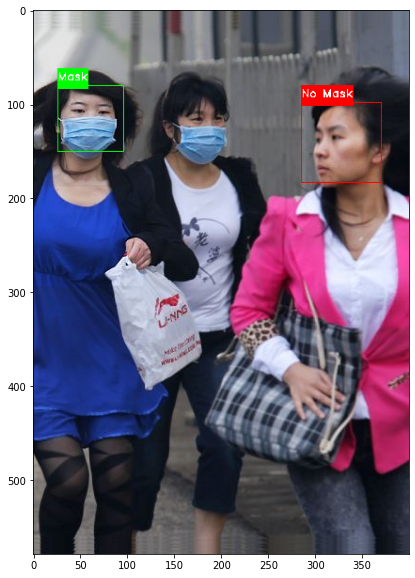

In [42]:

# label for mask detection
mask_det_label = {0: "Mask", 1: "No Mask"}
mask_det_label_colour = {0: (0, 255, 0), 1: (255, 0, 0)}
pad_y = 3 # padding for result text

main_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)  # colored output image

# For detected faces in the image
for i in range(len(return_faces)):
    (x, y, w, h) = return_faces[i]
    cropped_face = main_img[y : y + h, x : x + w]
    cropped_face = cv2.resize(cropped_face, (128, 128))
    cropped_face = np.reshape(cropped_face, [1, 128, 128, 3]) / 255.0
    mask_result = model.predict(cropped_face)  # make model prediction
    print_label = mask_det_label[mask_result.argmax()] # get mask/no mask based on prediction
    label_colour = mask_det_label_colour[mask_result.argmax()] # green for mask, red for no mask

    # Print result
    (t_w, t_h), _ = cv2.getTextSize(
        print_label, cv2.FONT_HERSHEY_SIMPLEX, 0.4, 1
    )  # getting the text size
    
    cv2.rectangle(
        main_img,
        (x, y + pad_y),
        (x + t_w, y - t_h - pad_y - 6),
        label_colour,
        -1,
    )  # draw rectangle
    cv2.putText(
        main_img,
        print_label,
        (x, y - 6),
        cv2.FONT_HERSHEY_DUPLEX,
        0.4,
        (255, 255, 255), # white
        1,
    )  # print text

    cv2.rectangle(
        main_img,
        (x, y),
        (x + w, y + h),
        label_colour,
        1,
    )  # draw bounding box on face
plt.figure(figsize=(10, 10))
plt.imshow(main_img)  # display image